# Hindmarsh_Rose

In [5]:
import numpy as np
from brian2 import *

In [6]:
# In the original model, time is measured in arbitrary time units
time_unit = 1*ms
dt = time_unit/10
defaultclock.dt = dt

In [212]:
input_current0 = np.hstack([np.zeros(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt))]) * nA
I = TimedArray(input_current0, dt=dt)

In [293]:
x_1 = -1.6  # leftmost equilibrium point of the model without adaptation
a = 1; b = 3; c = 1; d = 5
r = 0.001; s = 4
eqs = Equations('''
dx/dt = (y - a*x**3 + b*x**2 + 4* I(t)/nA - z)/time_unit : 1
dy/dt = (c - d*x**2 - y)/time_unit : 1
dz/dt = r*(s*(x - x_1) - z)/time_unit : 1
v = base + x * scale :1
base: 1 (constant)
scale: 1 (constant)
'''
)

In [294]:
start_scope()

In [295]:
# We run the model with three different currents
neuron = NeuronGroup(1, eqs, method='rk4')

In [296]:
# Set all variables to their equilibrium point
neuron.x = x_1
neuron.y = 'c - d*x**2'
neuron.z = 'r*(s*(x - x_1))'
neuron.scale = 24
neuron.base = -12

In [297]:
# Record the "membrane potential"
mon = StateMonitor(neuron, ['x', 'v', 'scale'], record=True)

In [298]:
run(30*ms)

In [299]:
vvv = mon.v

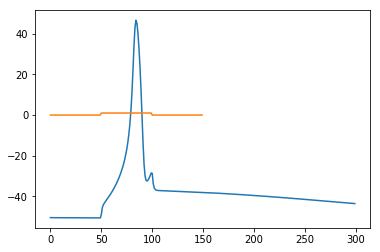

In [300]:
plot(vvv[0]);
plot(input_current0/nA)
# plot(mon.x[0]);
# plot(mon.scale[0])